# Visualization for thesis

## Set up

In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
import os
from os import path

import sys
sys.path.append("./../src")

In [2]:
from modules.logger import init_logging
from modules.logger import log

init_logging(color=True)

In [18]:
cache_path = path.join(os.getcwd(), '..', '.cache')
dataset_path = path.join(cache_path, 'dataset')
tmp_path = path.join('.cache', '2024-04-14')
os.makedirs(tmp_path,exist_ok=True)

## Run on OVH server

### Preparing dataset

Check if datasets in `.cache` or in `backup` are appropriate for the training

In [1]:
import pandas as pd

In [4]:
# esnli from .cache

df_esnli = pd.read_parquet('/Users/dunguyen/Developer/explanation_on_pair_sequences_task/.cache/dataset/esnli/test.pretransformed.parquet')
display(df_esnli.head())
display(df_esnli.columns)

,id,premise,hypothesis,label,explanation,highlight_premise,highlight_hypothesis,tokens.norm.premise,tokens.norm.hypothesis,rationale.premise,rationale.hypothesis,heuristic.premise,heuristic.hypothesis,tokens.form.premise,tokens.form.hypothesis
0,2677109430.jpg#1r1n,This church choir sings to the masses as they ...,The church has cracks in the ceiling.,neutral,Not all churches have cracks in the ceiling,This church choir sings to the masses as they ...,The church has *cracks* *in* *the* *ceiling.*,"[this, church, choir, sing, to, the, masse, as...","[the, church, have, crack, in, the, ceiling, .]","[False, False, False, False, False, False, Fal...","[False, False, False, True, True, True, True, ...","[-1.0000000150474662e+30, 3.064525842666626, 1...","[-1.0000000150474662e+30, 7.628961086273193, -...","[This, church, choir, sings, to, the, masses, ...","[The, church, has, cracks, in, the, ceiling, .]"
1,2677109430.jpg#1r1e,This church choir sings to the masses as they ...,The church is filled with song.,entailment,"""Filled with song"" is a rephrasing of the ""cho...",This church *choir* *sings* *to* *the* *masses...,The church is *filled* *with* *song.*,"[this, church, choir, sing, to, the, masse, as...","[the, church, be, fill, with, song, .]","[False, False, True, True, True, True, True, F...","[False, False, False, True, True, True, False]","[-1.0000000150474662e+30, 2.79181170463562, 2....","[-1.0000000150474662e+30, 7.628961086273193, -...","[This, church, choir, sings, to, the, masses, ...","[The, church, is, filled, with, song, .]"
2,2677109430.jpg#1r1c,This church choir sings to the masses as they ...,A choir singing at a baseball game.,contradiction,A choir sing some other songs other than book ...,This church choir sings to the *masses* as the...,A choir *singing* at a *baseball* *game.*,"[this, church, choir, sing, to, the, masse, as...","[a, choir, singing, at, a, baseball, game, .]","[False, False, False, False, False, False, Tru...","[False, False, True, False, False, True, True,...","[-1.0000000150474662e+30, 2.5598971843719482, ...","[-1.0000000150474662e+30, 6.388305187225342, 6...","[This, church, choir, sings, to, the, masses, ...","[A, choir, singing, at, a, baseball, game, .]"
3,6160193920.jpg#4r1n,"A woman with a green headscarf, blue shirt and...",The woman is young.,neutral,the woman could've been old rather than young,"A woman with a green headscarf, blue shirt and...",The woman is *young.*,"[a, woman, with, a, green, headscarf, ,, blue,...","[the, woman, be, young, .]","[False, False, False, False, False, False, Fal...","[False, False, False, True, False]","[-1.0000000150474662e+30, 2.597653388977051, -...","[-1.0000000150474662e+30, 5.648240089416504, -...","[A, woman, with, a, green, headscarf, ,, blue,...","[The, woman, is, young, .]"
4,6160193920.jpg#4r1e,"A woman with a green headscarf, blue shirt and...",The woman is very happy.,entailment,a grin suggests hapiness.,"A woman with a green headscarf, blue shirt and...",The woman is very *happy.*,"[a, woman, with, a, green, headscarf, ,, blue,...","[the, woman, be, very, happy, .]","[False, False, False, False, False, False, Fal...","[False, False, False, False, True, False]","[-1.0000000150474662e+30, 2.784580707550049, -...","[-1.0000000150474662e+30, 5.648240089416504, -...","[A, woman, with, a, green, headscarf, ,, blue,...","[The, woman, is, very, happy, .]"


Index(['id', 'premise', 'hypothesis', 'label', 'explanation',
       'highlight_premise', 'highlight_hypothesis', 'tokens.norm.premise',
       'tokens.norm.hypothesis', 'rationale.premise', 'rationale.hypothesis',
       'heuristic.premise', 'heuristic.hypothesis', 'tokens.form.premise',
       'tokens.form.hypothesis'],
      dtype='object')

## Chapter 4

### Render heuristics in HateXPlain

In [19]:
out_path = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/experiments/illustration_heuristics_hatexplain'
os.makedirs(out_path, exist_ok=True)

html_path = out_path + '/html'
os.makedirs(html_path, exist_ok=True)

In [20]:
import pandas as pd
import torch

# Load test set
testset_path = path.join(dataset_path, 'hatexplain', 'test.json')
df_test = pd.read_json(testset_path)

# Load attention maps
attention_path = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/lstm_attention/hatexplain/run=0_lstm=1/predictions/inference.json'
predictions = pd.read_json(attention_path)
predictions = predictions[['id', 'a_hat', 'y_hat', 'y_true', 'padding_mask']]

def clean_padding(row):
    a_hat = torch.tensor(row['a_hat'])
    padding_mask = torch.tensor(row['padding_mask'])
    return a_hat[~padding_mask].tolist()

predictions['a_hat'] = predictions[['a_hat', 'padding_mask']].apply(clean_padding, axis=1)

# Add prediction columns to the testset
df_test = df_test.merge(predictions, on='id')

In [21]:
# ignore the normal case
df_test = df_test[df_test['label'] != 'normal']

# Only correct predictions
df_test = df_test[df_test['y_hat'] == df_test['y_true']]

In [22]:
from modules.const import Color
from tqdm.auto import tqdm
from modules.utils import highlight
import html

dataset_name = 'HateXPlain'

for idx, row in tqdm(df_test.iterrows(), total=len(df_test)):
    
    tokens = row['tokens.form']
    tokens = [html.escape(tk) for tk in tokens]
    token_pos = [word + '<sub style="font-size: small" class="badge badge-' + ('info' if fil else 'danger' ) + '">' + pos + '</sub>' for word, pos, fil in zip(tokens, row['tokens.pos'], row['morpho_filter'])]
    
    html_str = '''<html>
    <head>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.6.2/dist/css/bootstrap.min.css" integrity="sha384-xOolHFLEh07PJGoPkLv1IbcEPTNtaed2xpHsD9ESMhqIYd0nLMwNLD69Npy4HI+N" crossorigin="anonymous">
    <style>
    table, th, td {
      border:solid black;
      border-collapse: collapse;
      padding: 0px 5px 0px 5px;
    }
    </style>
    </head>
    <body>
    <table style="font-size:120%;" cellspacing=0>
        <caption style="text-align: center;">Dataset: '''+ dataset_name +''' - Instance ID: '''+row['id'] + '''</caption>
        <tr><th style="width:200px;text-align:center;">Explainer</th> <th style="width:600px;text-align:center;">Explanation</th> <th style="width:100px;text-align:center;">Label</th></tr>

    '''
    
    html_str += '''<tr><td style="text-align:right;">Annotation map</td><td>''' + highlight(tokens, row['rationale'], color=Color.HIGHLIGHT) +\
                     '''</td><td rowspan="5" style="text-align:center">'''+ row['label'] +'''</td></tr>'''
    html_str += '''<tr><td style="text-align:right;">Annotation frequency</td><td>''' + highlight(tokens, row['tokens.frequency'], Color.HEURISTICS) + '''</td></tr>'''
    html_str += '''<tr><td style="text-align:right;">Morphosyntactic filter</td><td>''' + highlight(token_pos, row['morpho_filter'], Color.HEURISTICS) + '''</td></tr>'''
    #html_str += '''<tr><td style="text-align:right;">Morphosyntactic filter</td><td>''' + ' '.join(token_pos) + '''</td></tr>'''
    html_str += '''<tr><td style="text-align:right;">Heuristic map</td><td>''' + highlight(tokens, row['heuristics'], Color.HEURISTICS) + '''</td></tr>'''
    html_str += '''<tr><td style="text-align:right;">Attention map</td><td>''' + highlight(tokens, row['a_hat'], Color.ATTENTION) + '''</td></tr>'''
    
    html_str += '''
        </tr>
    </table></body></html>'''
    
    #display(HTML(html_str))
    
    with open(html_path + '/' + row['id'] + '.html', 'w') as f:
        f.write(html_str)

  0%|          | 0/749 [00:00<?, ?it/s]

### Visualize the effect of $\lambda$ of three methods (Constraint learning)

In [23]:
# root for data loading
ROOT = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs'

import yaml
import json
import pandas as pd
from tqdm.auto import tqdm

records = []

for technique in ['supervision', 'semisupervision', 'regularization']:

    technique_path = path.join(ROOT, technique)
    technique_folders = [f for f in os.listdir(technique_path) if not f.startswith('.')]

    for dataset in tqdm(technique_folders):
        dataset_path = path.join(technique_path, dataset)
        #print('dataset:', dataset)


        for instance in os.listdir(dataset_path):
            if instance.startswith('.'): continue # ignore tmp folders
            #print('instance:',instance)
            instance_path = path.join(dataset_path, instance)

            run_id = instance.split('_')[0].split('=')[1] 
            instance_id = instance

            # skip and signal if a file not exist
            if not path.exists(instance_path + '/hparams.yaml'):
                log.error(f'{instance_path}/hparams.yaml not exists')
                continue
            if not path.exists(instance_path + '/score.json'):
                log.error(f'{instance_path}/score.json not exists')
                continue

            # load hyperparameter
            with open(instance_path + '/hparams.yaml','r') as f:
                hparams = yaml.safe_load(f)
                # clean out hparam dictionary
                hparams.pop('concat_context') 

            # load result
            with open(instance_path + '/score.json','r') as f:
                score = json.load(f)
                # clean out score dictionary
                if 'a:AURecall' in score:
                    score['a:Recall'] = score.pop('a:AURecall')
                if 'a:AUPrecision' in score:
                    score['a:Precision'] = score.pop('a:AUPrecision')

            #print('hparams', hparams)
            #print('score', score)

            row = {
                'id': instance_id,
                'run': run_id,
                'Technique': technique,
                **hparams,
                **score
            }

            records.append(row)

summary = pd.DataFrame(records)

# clean out unnecessary columns
summary = summary.drop(columns=['y:accuracy', 'a:Dice', 'a:IoU', 'a:Jaccard']).rename(columns={'data':'Dataset'})
summary['Technique'] = summary['Technique'].replace({'supervision': 'Supervision', 'regularization':'Regularization', 'semisupervision':'Semi-supervision'})

  0%|          | 0/3 [00:00<?, ?it/s]

23-04-2024 18:07:36 |    ERROR   3854947111.py:<cell line: 11>:31  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/hatexplain/run=0_lstm=1_lsup=2.0/hparams.yaml not exists
23-04-2024 18:07:36 |    ERROR   3854947111.py:<cell line: 11>:31  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/hatexplain/run=0_lstm=5_lsup=0.10/hparams.yaml not exists
23-04-2024 18:07:36 |    ERROR   3854947111.py:<cell line: 11>:31  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/hatexplain/run=0_lstm=5_lsup=0.05/hparams.yaml not exists
23-04-2024 18:07:36 |    ERROR   3854947111.py:<cell line: 11>:34  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/esnli/run=0_lstm=5_lsup=5.0/score.json not exists
23-04-2024 18:07:36 |    ERROR   3854947111.py:<cell line: 11>:34  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/supervision/esnli/run=0_lstm=5_lsup=10.0/score.json not exists


  0%|          | 0/3 [00:00<?, ?it/s]

23-04-2024 18:07:36 |    ERROR   3854947111.py:<cell line: 11>:31  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/semisupervision/yelphat50/run=0_lstm=3_lheuris=0.08/hparams.yaml not exists
23-04-2024 18:07:36 |    ERROR   3854947111.py:<cell line: 11>:31  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/semisupervision/yelphat50/run=0_lstm=1_lheuris=0.20/hparams.yaml not exists
23-04-2024 18:07:36 |    ERROR   3854947111.py:<cell line: 11>:34  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/semisupervision/yelphat50/run=1_lstm=5_lheuris=0.4/score.json not exists
23-04-2024 18:07:36 |    ERROR   3854947111.py:<cell line: 11>:34  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/semisupervision/esnli/run=0_lstm=1_lheuris=0.01/score.json not exists


  0%|          | 0/3 [00:00<?, ?it/s]

23-04-2024 18:07:36 |    ERROR   3854947111.py:<cell line: 11>:34  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/regularization/esnli/run=0_lstm=1_lentr=10.0/score.json not exists
23-04-2024 18:07:36 |    ERROR   3854947111.py:<cell line: 11>:34  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/regularization/esnli/run=0_lstm=1_lentr=2.0/score.json not exists
23-04-2024 18:07:36 |    ERROR   3854947111.py:<cell line: 11>:34  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/regularization/esnli/run=1_lstm=3_lentr=0.01/score.json not exists
23-04-2024 18:07:36 |    ERROR   3854947111.py:<cell line: 11>:34  /Users/dunguyen/Developer/server_backup/historic/2023-06-05/logs/regularization/esnli/run=0_lstm=1_lentr=5.0/score.json not exists


Get subset for the current section

In [24]:
df_constraint = summary[summary['n_context'] == 1].copy().reset_index(drop=True)
df_constraint = df_constraint.drop(columns=['n_context'])

In [26]:
# fusion lambda column

def get_lambda(row):
    if row['Technique'] == 'Regularization':
        return row['lambda_entropy']
    if row['Technique'] == 'Supervision':
        return row['lambda_supervise']
    return row['lambda_heuristic']

df_constraint['lambda'] = df_constraint[['Technique', 'lambda_entropy', 'lambda_heuristic', 'lambda_supervise']].apply(get_lambda,axis=1)
df_constraint = df_constraint.drop(columns=['lambda_entropy', 'lambda_heuristic', 'lambda_supervise', 'lambda_lagrange'])

Classic render

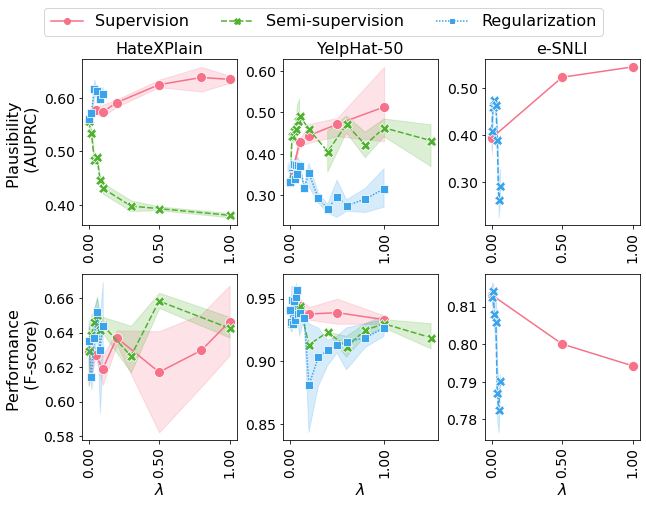

In [27]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
col = 0
row = 0

datasets = ['hatexplain', 'yelphat50', 'esnli']

report_metrics = [
    #{'y': 'a:Recall', 'ylabel': 'a:Recall' },
    #{'y': 'a:Specificity', 'ylabel': 'a:Specificity' },
    {'y': 'a:AUPRC', 'ylabel': 'Plausibility (AUPRC)' },
    {'y': 'y:fscore', 'ylabel': 'Performance (F-score)' },
]

colors = sns.color_palette("husl", 3)
palette_technique = {
    'Supervision': colors[0],
    'Semi-supervision': colors[1],
    'Regularization': colors[2],
}


for metric in report_metrics:
    
    for dataset in datasets:
        
        data = df_constraint[df_constraint['Dataset'] == dataset]
        data = data[data['lambda'] < 2]
        #data = data[data['Technique'] != 'Regularization']
        #data = data[data['lambda'] * 1000 % 10 == 0]
        
        ax = axes[row][col]
        col +=1
        if col > 2:
            col = 0
            row += 1

        graphic = sns.lineplot(ax=ax, data=data, x=f'lambda', y=metric['y'], 
                               #color=colors[0],
                               hue="Technique",
                               palette=palette_technique,
                               markers=True, 
                               style='Technique', 
                               markersize=10,
                              )


        #graphic.tick_params(labelrotation=90)
        ax.tick_params(axis='x', rotation=90, labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
        
# set labels
axes[0][0].set_title('HateXPlain',fontsize=16)
axes[0][1].set_title('YelpHat-50',fontsize=16)
axes[0][2].set_title('e-SNLI',fontsize=16)

#axes[0][0].set_ylabel('Plausibility \n (AUPRC)',fontsize=16)
#axes[1][0].set_ylabel('Performance \n (F-score)',fontsize=16)

axes[0][0].set_ylabel('Plausibility \n (AUPRC)',fontsize=16)
axes[1][0].set_ylabel('Performance \n (F-score)',fontsize=16)


axes[0][1].set_ylabel('',fontsize=16)
axes[1][1].set_ylabel('',fontsize=16)

axes[0][2].set_ylabel('',fontsize=16)
axes[1][2].set_ylabel('',fontsize=16)



axes[0][0].set_xlabel('')
axes[0][1].set_xlabel('')
axes[0][2].set_xlabel('')
axes[1][0].set_xlabel('$\lambda$',fontsize=16)
axes[1][1].set_xlabel('$\lambda$',fontsize=16)
axes[1][2].set_xlabel('$\lambda$',fontsize=16)

# no space between subfig
fig.subplots_adjust(hspace=.3, wspace=.3)

# make legend
lines, labels = axes[0][0].get_legend_handles_labels() 
fig.legend(lines, labels, loc='upper center', ncol=3, fontsize=16)

for ax in axes:
    for a in ax:
        a.get_legend().remove()
        
#plt.savefig(path.join(tmp_path, 'semisupervision_fscore_auprc.png'), bbox_inches="tight", dpi=300)
plt.show()
#print('Image saved in',path.join(tmp_path, 'semisupervision_fscore_auprc.png'))

Supervision vs semi-supervision

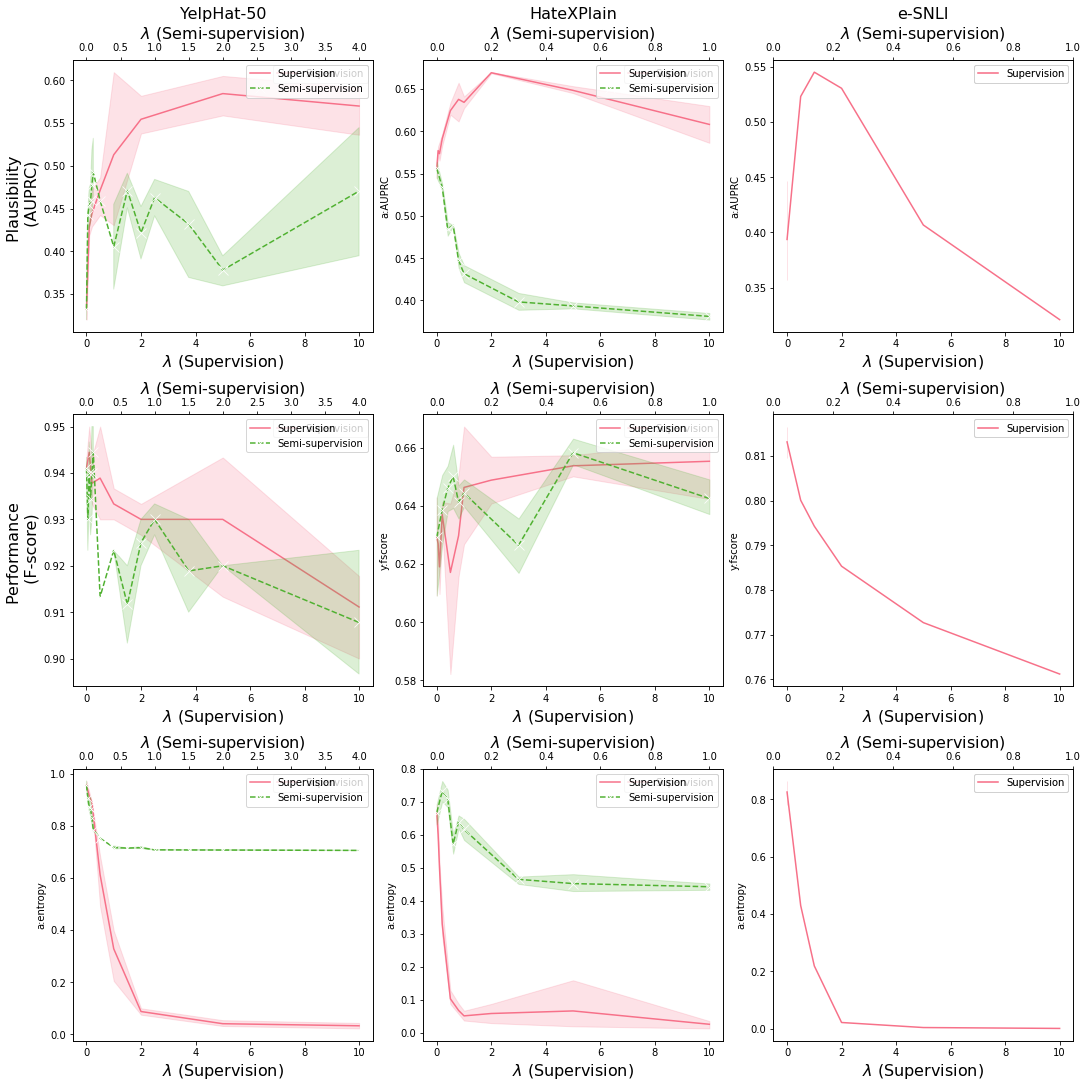

In [90]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(15, 15), constrained_layout=True)

ordered_dataset = ['yelphat50', 'hatexplain', 'esnli']
ordered_metrics = ['a:AUPRC', 'y:fscore', 'a:entropy']

def get_summary(df, technique, dataset):
    return df[(df['Technique'] == technique) & (df['Dataset'] == dataset)]

for idx_row, axe_row in enumerate(axes):

    metric = ordered_metrics[idx_row] 
    
    for idx_col, ax in enumerate(axe_row):

        dataset = ordered_dataset[idx_col]

        df_sup = get_summary(df_constraint, 'Supervision', dataset)
        df_sem = get_summary(df_constraint, 'Semi-supervision', dataset)

        sns.lineplot(x='lambda', y=metric, data=df_sup, markers='o', linestyle='-', color=colors[0], markersize=10, label='Supervision', ax=ax)
        ax.set_xlabel('$\lambda$ (Supervision)', fontsize=16)

        ax2 = ax.twiny()

        sns.lineplot(x='lambda', y=metric, data=df_sem, marker='x', linestyle='--', color=colors[1], markersize=10, label='Semi-supervision', ax=ax2)

        # Setting labels
        ax2.set_xlabel('$\lambda$ (Semi-supervision)', fontsize=16)

        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2)

# set labels
axes[0][0].set_title('YelpHat-50',fontsize=16)
axes[0][1].set_title('HateXPlain',fontsize=16)
axes[0][2].set_title('e-SNLI',fontsize=16)

axes[0][0].set_ylabel('Plausibility \n (AUPRC)',fontsize=16)
axes[1][0].set_ylabel('Performance \n (F-score)',fontsize=16)

plt.show()



Supervision vs regularization

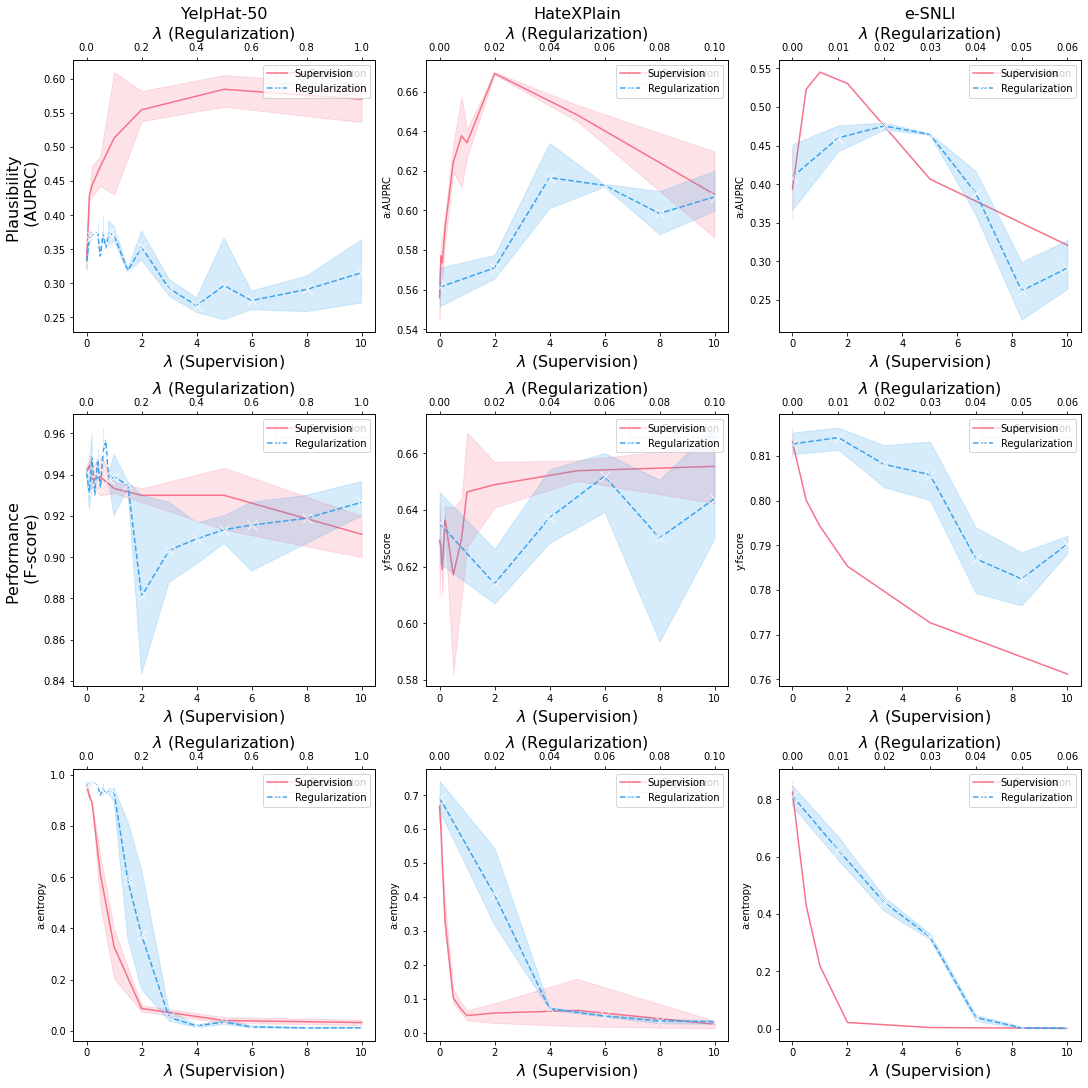

In [29]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(15, 15), constrained_layout=True)

ordered_dataset = ['yelphat50', 'hatexplain', 'esnli']
ordered_metrics = ['a:AUPRC', 'y:fscore', 'a:entropy']

def get_summary(df, technique, dataset):
    return df[(df['Technique'] == technique) & (df['Dataset'] == dataset)]

for idx_row, axe_row in enumerate(axes):

    metric = ordered_metrics[idx_row] 
    
    for idx_col, ax in enumerate(axe_row):

        dataset = ordered_dataset[idx_col]

        df_sup = get_summary(df_constraint, 'Supervision', dataset)
        df_reg = get_summary(df_constraint, 'Regularization', dataset)

        sns.lineplot(x='lambda', y=metric, data=df_sup, markers='o', linestyle='-', color=colors[0], markersize=10, label='Supervision', ax=ax)
        ax.set_xlabel('$\lambda$ (Supervision)', fontsize=16)

        ax2 = ax.twiny()

        sns.lineplot(x='lambda', y=metric, data=df_reg, markers='x', linestyle='--', color=colors[2], markersize=10, label='Regularization', ax=ax2)

        # Setting labels
        ax2.set_xlabel('$\lambda$ (Regularization)', fontsize=16)

        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2)

# set labels
axes[0][0].set_title('YelpHat-50',fontsize=16)
axes[0][1].set_title('HateXPlain',fontsize=16)
axes[0][2].set_title('e-SNLI',fontsize=16)

axes[0][0].set_ylabel('Plausibility \n (AUPRC)',fontsize=16)
axes[1][0].set_ylabel('Performance \n (F-score)',fontsize=16)

plt.show()

